In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from clean import clean_json
from scrape import scrape_multiple_years
import os

import simple_visualization as sv

In [22]:
df = pd.read_csv('2016_to_2020.csv')

KeyboardInterrupt: 

In [ ]:
input_path = os.path.join('data\datasets','2019.json')
output_path = os.path.join('data\datasets','2019.csv')

In [ ]:
df = clean_json(input_path, output_path)

In [ ]:
df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
0,1,REGULAR,00:25,2019020001,9,Ottawa Senators,Goal,Brady Tkachuk,Frederik Andersen,Tip-In,85.0,-1.0,False,Even,Toronto Maple Leafs
1,1,REGULAR,01:31,2019020001,10,Toronto Maple Leafs,Shot,Morgan Rielly,Craig Anderson,Snap Shot,-32.0,-2.0,NaN,NaN,Toronto Maple Leafs
2,1,REGULAR,03:23,2019020001,9,Ottawa Senators,Shot,Dylan DeMelo,Frederik Andersen,Snap Shot,63.0,-6.0,NaN,NaN,Toronto Maple Leafs
3,1,REGULAR,03:56,2019020001,10,Toronto Maple Leafs,Shot,Morgan Rielly,Craig Anderson,Wrist Shot,-59.0,-20.0,NaN,NaN,Toronto Maple Leafs
4,1,REGULAR,04:47,2019020001,10,Toronto Maple Leafs,Shot,Tyson Barrie,Craig Anderson,Slap Shot,-42.0,-29.0,NaN,NaN,Toronto Maple Leafs


QUESTION 1 : 

In [ ]:
import matplotlib.pyplot as plt

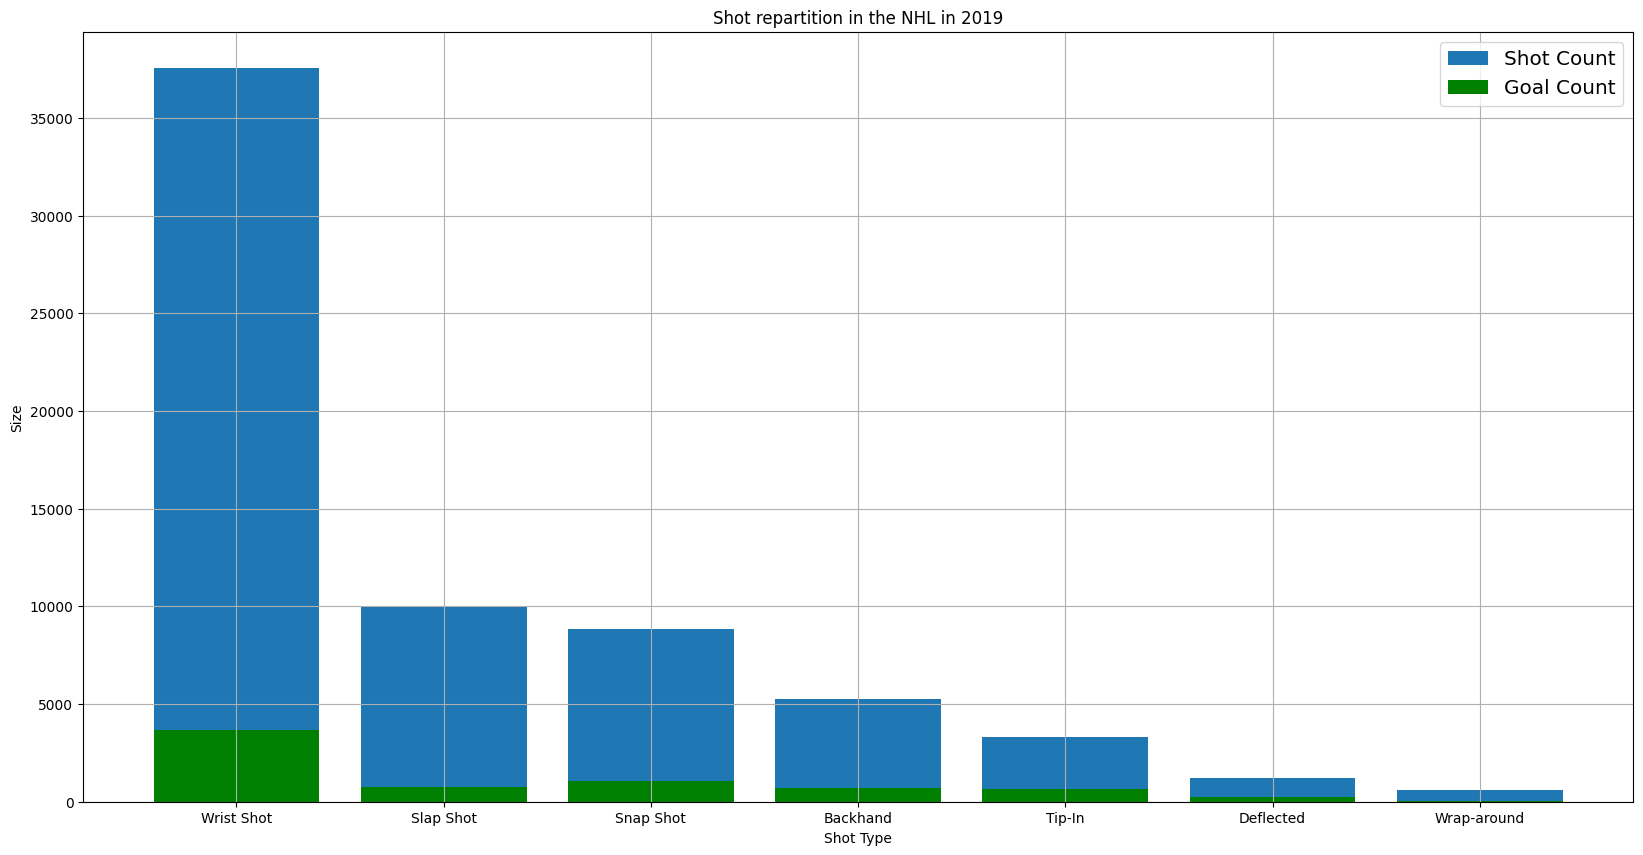

In [ ]:
year = 2019
sv.plot_shot_repartition_NHL(df,year)

On voit que le type de tir le plus courant est le 'Wrist shot'. Le type de tir le plus efficace est le 'Deflected' qui est suivi de près par le 'Tip-In'; cependant ces tirs sont plus rares. 

Le choix d'un histogramme nous permet de mieux visualiser le volume de tir pour chaque type de tir, ainsi que la proportion de buts.

$$\textbf{Création d'un outil de visualisation interactif sur la répartition des tirs pour une équipe donnée}$$

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
def plot_interactive_hist(team_name):
    sv.hist_shot_repartition_by_team(team_name, df, year)

In [ ]:
team_list = df['attacking_team_name'].unique()
team_dropdown = widgets.Dropdown(
    options=team_list,
    description='Team:'
)

In [ ]:
interactive_plot = widgets.interactive(plot_interactive_hist, team_name=team_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Team:', options=('Ottawa Senators', 'Toronto Maple Leafs', 'St. Lo…

$\textbf{Visualisation de la répartition des tirs sous forme d'un graphe en camembert}$

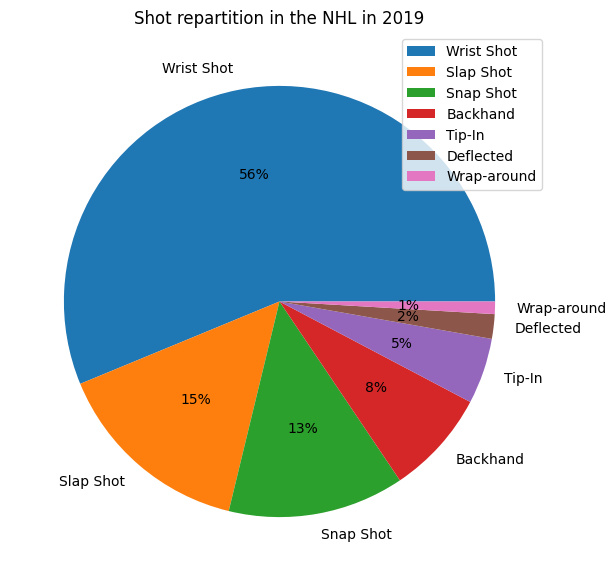

In [ ]:
sv.pie_shot_repartition_NHL(df,year)

QUESTION 2 : (TO BE CONTINUED)

In [ ]:
df = sv.df_add_distance_to_net(df)

In [ ]:
max(df['distance_to_net'])

97.57561170702442

D'après le reglèment de la NHL, les joueurs n'ont pas le droit de tirer avant d'avoir passer la ligne médiane du terrain. 

La distance de tir maximale correspond aux extremités de la ligne médiane :
$$ d_{max} = \sqrt{89^{2} + 42.5^{2}} \approx 98 $$

On travaille donc avec des intervalles de 0 à 100 avec un pas de 2.5 

In [ ]:
bins = np.arange(0,102.5,2.5)
bin_centers = np.arange(1.25, 100, 2.5)

In [ ]:
efficacy_rate = sv.get_efficiency_rate_by_distance(df, bins, bin_centers)

Text(0.5, 1.0, 'Efficacy rate in function of the distance from the net')

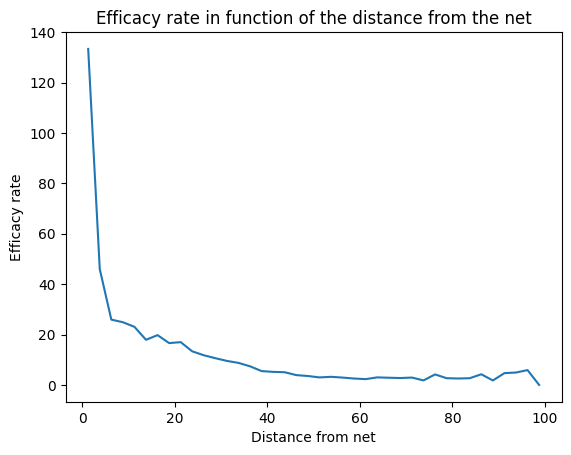

In [ ]:
plt.plot(bin_centers,100*efficacy_rate)
plt.xlabel('Distance from net')
plt.ylabel('Efficacy rate')
plt.title('Efficacy rate in function of the distance from the net')

In [ ]:
shot_type_list = df['shot_type'].unique()
shot_type_dropdown = widgets.Dropdown(
    options = shot_type_list,
    description='Shot Type:'
)

In [ ]:
def plot_efficiency_rate(shot_type):
    sv.plot_efficiency_rate_by_shot_type(shot_type, df, bins, bin_centers) 

In [20]:
interactive_efficiency_plot = widgets.interactive(plot_efficiency_rate, shot_type=shot_type_dropdown)
display(interactive_efficiency_plot)

interactive(children=(Dropdown(description='Shot Type:', options=('Tip-In', 'Snap Shot', 'Wrist Shot', 'Slap S…